 # Create a Headline
Create a new cell.  
Put the cursor in the new cell.  
Press Esc key.   
Press m key.  
Write your comment.  
Press shift+Enter keys. 


# Load MNIST Data


In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

# MNIST Data Format

In [3]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)

(60000, 28, 28)
60000
3


In [4]:
#test_images[0]   # 28x28 digits in grey level 0-255

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
print('test_images.shape:{}'.format(test_images.shape))
print('test_labels.ndim:{}'.format(test_images.ndim))
print('len(test_images):{}'.format(len(test_images)))

test_images.shape:(10000, 28, 28)
test_labels.ndim:3
len(test_images):10000


In [7]:
#print('test_image_sample  {}'.format(test_images[0]))
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#  Plot the Digits

In [8]:
digit = train_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[0:10])

<Figure size 640x480 with 1 Axes>

[5 0 4 1 9 2 1 3 1 4]


#  Manipulate the Data


slice_images.shape: (10, 28, 28)
slice_images.ndim 3
slice_labels  [5 0 4 1 9 2 1 3 1 4]

Slice 2
slice2_images.shape: (10, 14, 14)
slice2_images.ndim 3



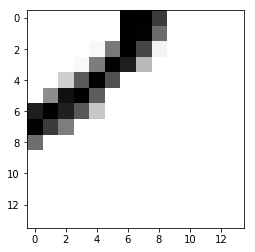


Slice 3
slice3_images.shape: (10, 14, 14)
slice3_images.ndim 3



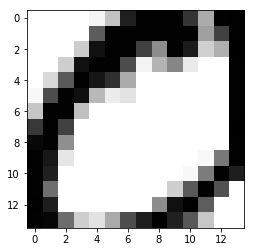

In [9]:
slice_images = train_images[0:10]
print("")
slice_labels = train_labels[0:10]
print('slice_images.shape: {}'.format(slice_images.shape))
print('slice_images.ndim {}'.format(slice_images.ndim))
print('slice_labels  {}'.format(slice_labels))

print("")
print('Slice 2')
#Part of image from row 14 to 27 and column 14 to 27
slice2_images = slice_images[:, 14:, 14:]
print('slice2_images.shape: {}'.format(slice2_images.shape))
print('slice2_images.ndim {}'.format(slice2_images.ndim))
print('')
digit2 = slice2_images[1]
#import matplotlib.pyplot as plt
plt.imshow(digit2, cmap=plt.cm.binary)
plt.show()
print('')
#Part of image from row 7 to -7 and column 7 to 7
print('Slice 3')
slice3_images = slice_images[:, 7:-7, 7:-7]
print('slice3_images.shape: {}'.format(slice3_images.shape))
print('slice3_images.ndim {}'.format(slice3_images.ndim))
print('')
digit3 = slice3_images[1]
#import matplotlib.pyplot as plt
plt.imshow(digit3, cmap=plt.cm.binary)
plt.show()
print('')

# Prepare the Images

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print('train_images.shape: {}'.format(train_images.shape))
print('train_images.ndim: {}'.format(train_images.ndim))

train_images.shape: (60000, 784)
train_images.ndim: 2


# Prepare the Labels

In [11]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)  # Convert labels to 1-hot
test_labels = to_categorical(test_labels)    # Convert labels to 1-hot
print('train_labels.shape: {}'.format(train_labels.shape))
print('train_labels.ndim {}'.format(train_labels.ndim))
print(train_labels[0])

train_labels.shape: (60000, 10)
train_labels.ndim 2
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# The Network Architecture

In [12]:
from keras import models
from keras import layers
network = models.Sequential() # Specify layers in their sequential order
# inputs are vectors in R^28*28 = R^784
# Dense = Fully Connected.  
# Hidden layer has 512 neurons with ReLU activations.
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # sigmoid 
# Ouput layer uses softmax with 10 ouput neurons
# Assume there are 512 neurons going into the output layer
network.add(layers.Dense(10, activation='softmax')) # sigmoid relu

# Compile the Network

In [13]:
network.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Options for  optimizer = 'adam', 'sgd'
# Other Options loss = 'mean_squared_error' or 'mse'

# Train the Network

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#  "fit" refers to fitting the network weights to the data

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 4s 65us/step - loss: 0.2704 - acc: 0.9233
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.1089 - acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0709 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0503 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0375 - acc: 0.9887


# Check Accuracy on Test Data

In [16]:
network.evaluate(np.array(test_images), np.array(test_labels), batch_size=len(test_images))

10000/10000 [==============================] - 0s 8us/step


[0.06340791285037994, 0.980400025844574]